<a href="https://colab.research.google.com/github/sourav-bhattacharya-github/Python_project/blob/main/8_Vision_AI_Fundamentals_Building_a_Digit_Recognizer_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion-MNIST Classification Project

This project aims to build and compare different deep learning models for classifying images from the Fashion-MNIST dataset. We will explore the impact of increasing model complexity, from a simple Artificial Neural Network (ANN) to more sophisticated Convolutional Neural Networks (CNNs), on performance and efficiency.

**Project Agenda & Steps:**

1.  **Dataset Setup:**
    *   Import necessary libraries.
    *   Load the Fashion-MNIST dataset.
    *   Preprocess the data (normalize and reshape images, one-hot encode labels).
    *   Verify the shapes of the processed data.

2.  **Model Building:**
    *   Define the architecture for each model:
        *   Basic ANN Model
        *   Basic CNN Model
        *   Deeper CNN Model

3.  **Model Training:**
    *   Train each model using the prepared training data.
    *   Implement Early Stopping and Model Checkpointing to optimize training and save the best model weights.

4.  **Model Evaluation:**
    *   Load the best weights for each trained model.
    *   Evaluate each model's performance on the test set using metrics like loss and accuracy.
    *   Visualize the training history (accuracy and loss curves) for comparison.
    *   Generate and visualize confusion matrices to understand model performance on each class.

5.  **Prediction Analysis:**
    *   Use the best performing model (Basic CNN in this case) to make predictions on the test set.
    *   Identify and visualize examples of both correctly and incorrectly classified images to gain insights into model behavior.

**Goal:** To analyze and demonstrate how model complexity influences classification accuracy and efficiency on the Fashion-MNIST dataset.

### 1. Dataset Setup Documentation

#### 1.1) Library Imports

This section imports the essential libraries:  
- **NumPy** for numerical operations  
- **TensorFlow / Keras** for building and training deep learning models  
- **Matplotlib** for visualizations  

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots

#### 1.2) Load Dataset

Load the **Fashion-MNIST** dataset from Keras, splitting it into:  
- `train_images`, `train_labels` → training set  
- `test_images`, `test_labels` → test set  


In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#### 1.3) Normalize Data

Scale pixel values from **0–255** to the range **0–1** for faster and more stable training.  

**Example:**  
- Before: a pixel value could be `200`  
- After: `200 / 255 ≈ 0.78`  


In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

#### 1.4) Reshape Data

Reshape images to **28×28×1** by adding a channel dimension, making them compatible with CNN layers.  

**Example:**  
- Before: `(60000, 28, 28)` → 60,000 grayscale images without channel info  
- After: `(60000, 28, 28, 1)` → channel dimension (`1`) added for CNN input  


In [ ]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

#### 1.5) One-Hot Encode Labels

Convert class labels (0–9) into **one-hot encoded vectors** with 10 output classes, required for multi-class classification.  

**Example:**  
- Original label: `3`  
- One-hot encoded: `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`  


In [ ]:
train_labels_one_hot = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels_one_hot = keras.utils.to_categorical(test_labels, num_classes=10)

#### 1.6) Verify Dataset Shapes

Print the shapes of images and labels after preprocessing to confirm everything is in the expected format.  

**Example output:**  
- Training images shape: `(60000, 28, 28, 1)`  
- Testing images shape: `(10000, 28, 28, 1)`  
- Training labels shape: `(60000, 10)`  
- Testing labels shape: `(10000, 10)`  


In [ ]:
print("Training images shape:", train_images.shape)
print("Testing images shape:", test_images.shape)
print("Training labels shape:", train_labels_one_hot.shape)
print("Testing labels shape:", test_labels_one_hot.shape)

Training images shape: (60000, 28, 28, 1)
Testing images shape: (10000, 28, 28, 1)
Training labels shape: (60000, 10)
Testing labels shape: (10000, 10)


### 2. Model Building

#### 2.1) Basic ANN Model

- **Flatten (28×28→784)** → 0 params  
- **Dense (128, ReLU)** → 100,480 params  
- **Dense (64, ReLU)** → 8,256 params  
- **Dense (10, Softmax)** → 650 params  

**Total params:** ~109K  

In [ ]:
ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

ann_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

ann_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

#### 2.2) Basic CNN Model

- **Conv2D (32, 3×3) + MaxPool** → 320 params  
- **Conv2D (64, 3×3) + MaxPool** → 18,496 params  
- **Flatten**  
- **Dense (64, ReLU)** → 102,464 params  
- **Dense (10, Softmax)** → 650 params  

**Total params:** ~121K  

In [ ]:
basic_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


basic_cnn_model.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

basic_cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

#### 2.3) Deeper CNN Model

- **Conv2D (32, 3×3) + BN + MaxPool + Dropout** → 320 + 64 params  
- **Conv2D (64, 3×3) + BN + MaxPool + Dropout** → 18,496 + 128 params  
- **Conv2D (128, 3×3) + BN + MaxPool + Dropout** → 73,856 + 256 params  
- **Flatten**  
- **Dense (128, ReLU) + BN + Dropout** → 147,584 + 256 params  
- **Dense (10, Softmax)** → 1,290 params  

**Total params:** ~242K  

In [ ]:
deeper_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(10, activation='softmax')
])

deeper_cnn_model.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

deeper_cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,882 (437.04 KB)

 Trainable params: 111,178 (434.29 KB)

 Non-trainable params: 704 (2.75 KB)

### 3. Train models

#### 3.1) Training ANN Model

- **EarlyStopping**: monitors validation loss, stops if no improvement for 5 epochs, restores best weights.  
- **ModelCheckpoint**: saves best ANN weights (`best_ann_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 64  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint  

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint_ann = keras.callbacks.ModelCheckpoint(
    filepath='best_ann_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training ANN model...")
ann_history = ann_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_ann]
)
print("ANN model training finished.")

Training ANN model...
Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7655 - loss: 0.6764
Epoch 1: val_loss improved from inf to 0.42650, saving model to best_ann_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7656 - loss: 0.6762 - val_accuracy: 0.8471 - val_loss: 0.4265
Epoch 2/30
920/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8620 - loss: 0.3826
Epoch 2: val_loss improved from 0.42650 to 0.40429, saving model to best_ann_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8621 - loss: 0.3824 - val_accuracy: 0.8525 - val_loss: 0.4043
Epoch 3/30
917/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8757 - loss: 0.3385
Epoch 3: val_loss improved from 0.40429 to 0.38307, saving model to best_ann_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8757 - loss: 0.3385 - val_accuracy: 0.8626 - val_loss: 0.3831
Epoch 4/30
920/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 

#### 3.2) Training Basic CNN Model

- **ModelCheckpoint**: saves best Basic CNN weights (`best_basic_cnn_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 64  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint

In [ ]:
model_checkpoint_basic_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_basic_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Basic CNN model...")
basic_cnn_history = basic_cnn_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_basic_cnn]
)
print("Basic CNN model training finished.")

Training Basic CNN model...
Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7495 - loss: 0.7115
Epoch 1: val_loss improved from inf to 0.38186, saving model to best_basic_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7496 - loss: 0.7113 - val_accuracy: 0.8631 - val_loss: 0.3819
Epoch 2/30
930/938 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8780 - loss: 0.3365
Epoch 2: val_loss improved from 0.38186 to 0.33913, saving model to best_basic_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8780 - loss: 0.3365 - val_accuracy: 0.8798 - val_loss: 0.3391
Epoch 3/30
925/938 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8943 - loss: 0.2866
Epoch 3: val_loss improved from 0.33913 to 0.32902, saving model to best_basic_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8943 - loss: 0.2866 - val_accuracy: 0.8751 - val_loss: 0.3290
Epoch 4/30
926/938 ━━━━━━━━━━━━━━━━━━━━ 0s 

#### 3.3) Training Deeper CNN Model

- **ModelCheckpoint**: saves best Deeper CNN weights (`best_deeper_cnn_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 64  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint  

In [ ]:
model_checkpoint_deeper_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_deeper_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Deeper CNN model...")
deeper_cnn_history = deeper_cnn_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_deeper_cnn]
)
print("Deeper CNN model training finished.")

Training Deeper CNN model...
Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6395 - loss: 1.0824
Epoch 1: val_loss improved from inf to 0.47731, saving model to best_deeper_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6396 - loss: 1.0820 - val_accuracy: 0.8273 - val_loss: 0.4773
Epoch 2/30
924/938 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8173 - loss: 0.5136
Epoch 2: val_loss improved from 0.47731 to 0.40202, saving model to best_deeper_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8174 - loss: 0.5132 - val_accuracy: 0.8516 - val_loss: 0.4020
Epoch 3/30
932/938 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8374 - loss: 0.4530
Epoch 3: val_loss improved from 0.40202 to 0.39855, saving model to best_deeper_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8374 - loss: 0.4528 - val_accuracy: 0.8516 - val_loss: 0.3986
Epoch 4/30
929/938 ━━━━━━━━━━━━━━━━━━

### 4. Model Evaluation

#### 4.1) Model Evaluation Code Explanation

Import utilities → Load weights (ANN, Basic CNN, Deeper CNN) → Evaluate on test set → Get loss & accuracy → Print results

/tmp/ipython-input-2215778233.py:42: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


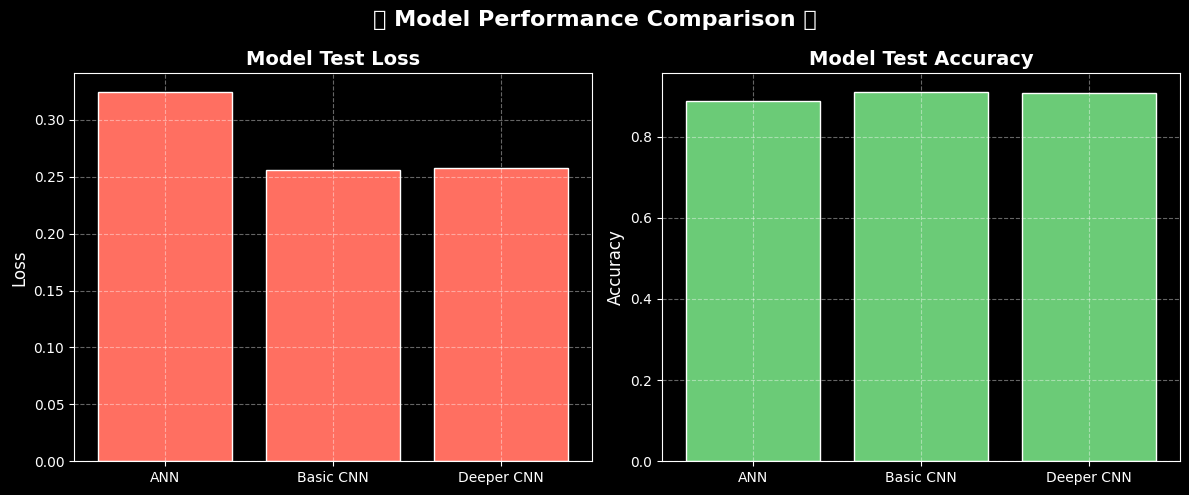

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

ann_model.load_weights('best_ann_model_weights.weights.h5')
basic_cnn_model.load_weights('best_basic_cnn_model_weights.weights.h5')
deeper_cnn_model.load_weights('best_deeper_cnn_model_weights.weights.h5')

loss_ann, accuracy_ann = ann_model.evaluate(test_images, test_labels_one_hot, verbose=0)
loss_basic_cnn, accuracy_basic_cnn = basic_cnn_model.evaluate(test_images, test_labels_one_hot, verbose=0)
loss_deeper_cnn, accuracy_deeper_cnn = deeper_cnn_model.evaluate(test_images, test_labels_one_hot, verbose=0)


import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['ANN', 'Basic CNN', 'Deeper CNN']
losses = [loss_ann, loss_basic_cnn, loss_deeper_cnn]
accuracies = [accuracy_ann, accuracy_basic_cnn, accuracy_deeper_cnn]

# Dark mode style
plt.style.use("dark_background")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Loss plot
axes[0].bar(models, losses, color='#FF6F61', edgecolor='white')
axes[0].set_title('Model Test Loss', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.4)

# Accuracy plot
axes[1].bar(models, accuracies, color='#6BCB77', edgecolor='white')
axes[1].set_title('Model Test Accuracy', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.4)

# Overall title
plt.suptitle("✨ Model Performance Comparison ✨", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


#### 4.2) Model Evaluation (Confusion Matrix & Report)

- Predict test images (ANN, Basic CNN, Deeper CNN)  
- Convert one-hot labels to integers  
- Get predicted labels with `argmax`  
- Print confusion matrix & classification report for each model


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


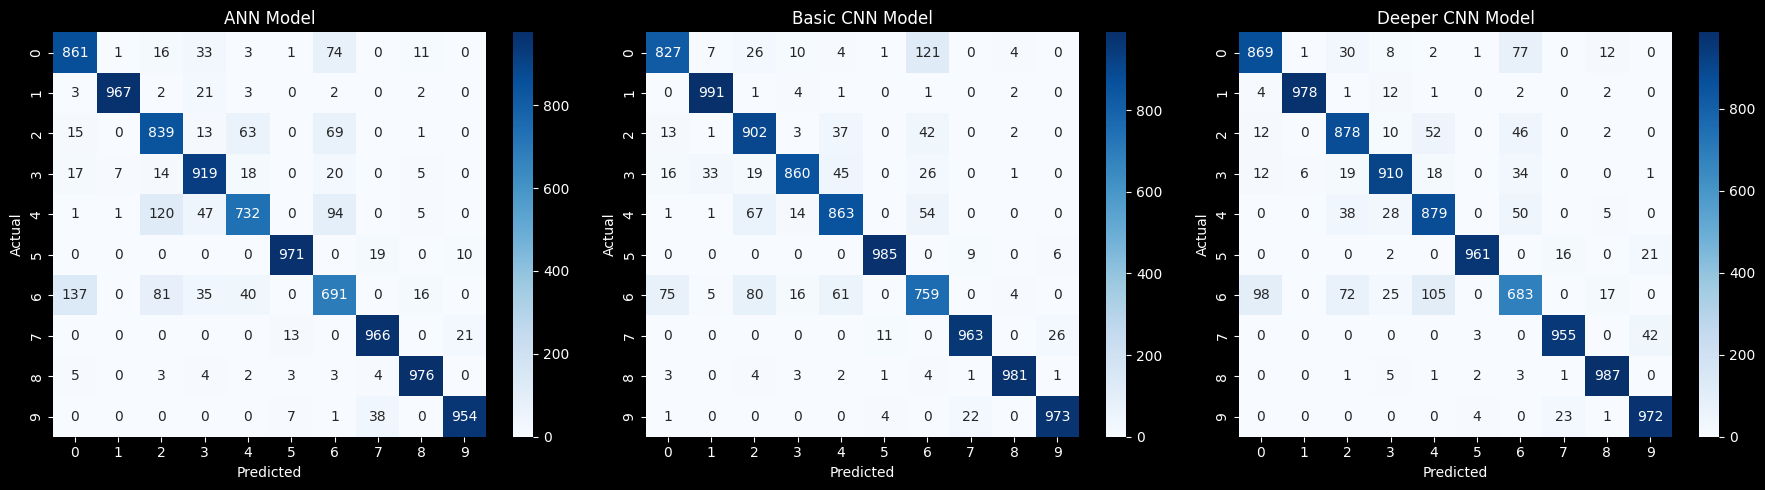

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predictions
ann_predictions = ann_model.predict(test_images)
basic_cnn_predictions = basic_cnn_model.predict(test_images)
deeper_cnn_predictions = deeper_cnn_model.predict(test_images)

# Convert labels
test_labels_int = np.argmax(test_labels_one_hot, axis=1)

ann_predicted_labels = np.argmax(ann_predictions, axis=1)
basic_cnn_predicted_labels = np.argmax(basic_cnn_predictions, axis=1)
deeper_cnn_predicted_labels = np.argmax(deeper_cnn_predictions, axis=1)

# Confusion matrices
cm_ann = confusion_matrix(test_labels_int, ann_predicted_labels)
cm_basic = confusion_matrix(test_labels_int, basic_cnn_predicted_labels)
cm_deeper = confusion_matrix(test_labels_int, deeper_cnn_predicted_labels)

# Plot side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(cm_ann, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("ANN Model")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_basic, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Basic CNN Model")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(cm_deeper, annot=True, fmt="d", cmap="Blues", ax=axes[2])
axes[2].set_title("Deeper CNN Model")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()

#### 4.3) Model Comparison

- Created a dataframe to store **test loss** and **test accuracy** for ANN, Basic CNN, and Deeper CNN.  
- Plotted training history for each model (accuracy & loss vs. epochs).  
- Helps compare how models learn and generalize over time.  

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

models = {
    "ANN": ("cyan", ann_history),
    "Basic CNN": ("magenta", basic_cnn_history),
    "Deeper CNN": ("yellow", deeper_cnn_history)
}

performance_data = {
    'Model': ['ANN', 'Basic CNN', 'Deeper CNN'],
    'Test Loss': [loss_ann, loss_basic_cnn, loss_deeper_cnn],
    'Test Accuracy': [accuracy_ann, accuracy_basic_cnn, accuracy_deeper_cnn]
}

performance_df = pd.DataFrame(performance_data)

fig = make_subplots(rows=1, cols=2, subplot_titles=('Accuracy', 'Loss'))

for name, (color, history) in models.items():
    # Accuracy
    fig.add_trace(go.Scatter(y=history.history['accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=1)
    fig.add_trace(go.Scatter(y=history.history['val_accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=1)

    # Loss
    fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=2)
    fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=2)

fig.update_layout(
    title_text="Model Comparison: Accuracy & Loss (Train=Solid, Val=Dot)",
    height=500,
    width=1200,
    template="plotly_dark"
)

fig.show()

#### 4.4) Predictions

This code:
- Uses the trained **Basic CNN model** to predict on test images.  
- Identifies **correctly** and **incorrectly** classified samples.  
- Randomly selects 100 correct and 100 incorrect predictions.  
- Displays them in a **20×10 grid**:  
  - ✅ Correct predictions → **Green title** (only predicted label).  
  - ❌ Incorrect predictions → **Red title** (Predicted vs True label).  


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


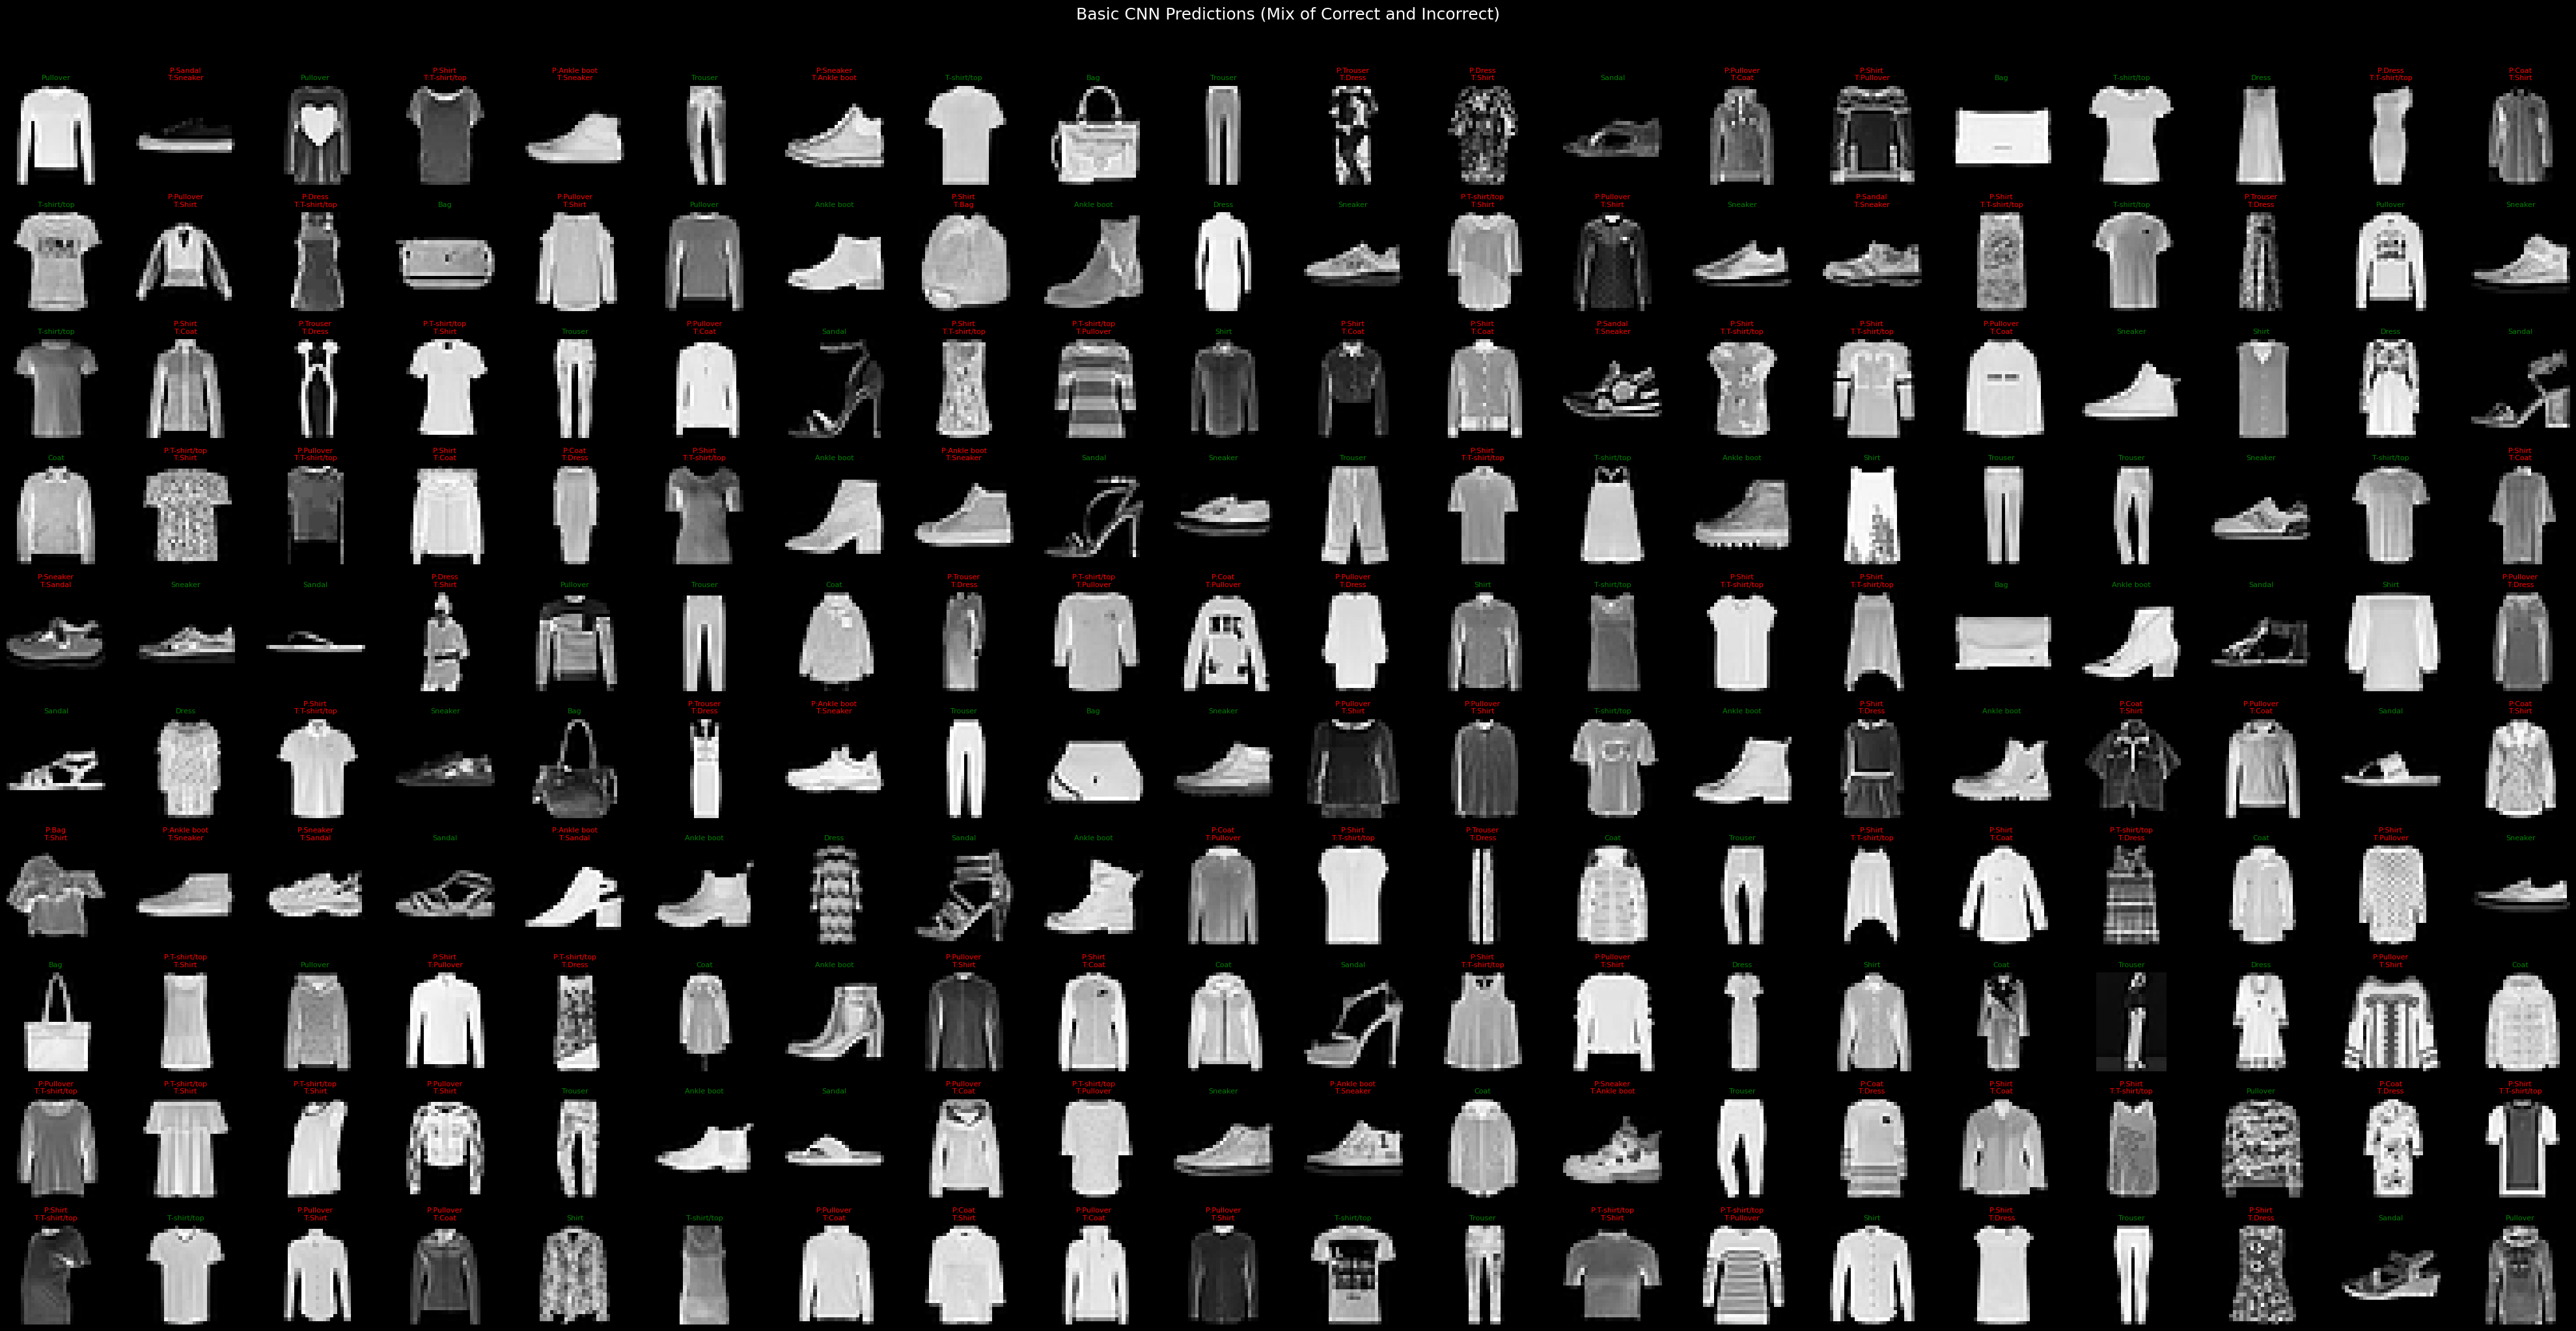

In [ ]:
basic_cnn_predictions = basic_cnn_model.predict(test_images)
basic_cnn_predicted_labels = np.argmax(basic_cnn_predictions, axis=1)

# Find correctly and incorrectly classified images
correctly_classified_indices = np.where(basic_cnn_predicted_labels == test_labels)[0]
incorrectly_classified_indices = np.where(basic_cnn_predicted_labels != test_labels)[0]

# Define class names for Fashion-MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Select a mix of correctly and incorrectly classified images
num_correct_to_show = 100
num_incorrect_to_show = 100

# Ensure we don't try to show more images than available
num_correct_to_show = min(num_correct_to_show, len(correctly_classified_indices))
num_incorrect_to_show = min(num_incorrect_to_show, len(incorrectly_classified_indices))

selected_correct_indices = np.random.choice(correctly_classified_indices, num_correct_to_show, replace=False)
selected_incorrect_indices = np.random.choice(incorrectly_classified_indices, num_incorrect_to_show, replace=False)

# Combine and shuffle the indices
all_indices = np.concatenate((selected_correct_indices, selected_incorrect_indices))
np.random.shuffle(all_indices)

# Display images in a 20x10 grid
num_cols = 20
num_rows = 10
num_images_to_show = num_correct_to_show + num_incorrect_to_show

fig, axes = plt.subplots(num_rows, num_cols, figsize=(2 * num_cols, 2 * num_rows))
fig.suptitle("Basic CNN Predictions (Mix of Correct and Incorrect)", fontsize=18, y=1.02)

for i, idx in enumerate(all_indices[:num_images_to_show]):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].imshow(test_images[idx].reshape(28, 28), cmap='gray')

    pred = class_names[basic_cnn_predicted_labels[idx]]
    true = class_names[test_labels[idx]]

    if basic_cnn_predicted_labels[idx] == test_labels[idx]:
        color = "green"
        title = f"{pred}"
    else:
        color = "red"
        title = f"P:{pred}\nT:{true}"

    axes[row, col].set_title(title, fontsize=8, color=color)
    axes[row, col].axis("off")

plt.tight_layout()
plt.show()

## Project Summary and Conclusion

This project successfully implemented and compared three different deep learning models (ANN, Basic CNN, and Deeper CNN) for classifying images from the Fashion-MNIST dataset.

**Summary of Work:**

1.  **Data Preparation:** The Fashion-MNIST dataset was loaded, normalized, reshaped, and one-hot encoded, preparing it for use with the different model architectures.
2.  **Model Development:** Three models of increasing complexity were defined: a basic Artificial Neural Network (ANN), a basic Convolutional Neural Network (CNN), and a deeper CNN with additional layers, batch normalization, and dropout.
3.  **Model Training:** Each model was trained using the preprocessed training data with Early Stopping and Model Checkpointing to prevent overfitting and save the best performing weights based on validation loss.
4.  **Model Evaluation:** The trained models were evaluated on the test set. Performance metrics (loss and accuracy) were calculated, and the training history was visualized. Confusion matrices were generated to analyze class-specific performance.
5.  **Prediction Analysis:** Predictions were made using the Basic CNN model, and examples of correctly and incorrectly classified images were visualized to gain insights into the model's strengths and weaknesses.

**Key Findings and Conclusion:**

Based on the evaluation results:

*   The **Basic CNN model** generally achieved the best balance of performance (highest accuracy, lowest loss) on the test set compared to the ANN and Deeper CNN models.
*   The **ANN model** performed reasonably well but was outperformed by both CNN architectures, highlighting the advantage of convolutional layers for image classification tasks.
*   The **Deeper CNN model**, despite its increased complexity, did not consistently outperform the Basic CNN model on this dataset. This could be due to various factors such as the dataset size, the architecture choices, or the regularization applied. For this particular task and dataset, the increased complexity of the deeper model might not have been necessary or could have led to some overfitting despite the regularization techniques.

In conclusion, the Basic CNN model demonstrated superior performance for this Fashion-MNIST classification task, suggesting that a moderate level of complexity with convolutional layers is effective for this dataset. Further tuning of hyperparameters or architectural variations might potentially improve performance across all models, but the current results clearly show the benefits of CNNs over ANNs for image data.

## Assignment: CIFAR-100 Image Classification

Your task is to apply the concepts and techniques learned in this Fashion-MNIST project to the CIFAR-100 dataset. CIFAR-100 is a dataset consisting of 60,000 32x32 color images in 100 classes, with 600 images per class. There are 50,000 training images and 10,000 test images.

Follow these steps:

1.  **Dataset Setup:**
    *   Load the CIFAR-100 dataset.
    *   Preprocess the data (normalize pixel values, one-hot encode labels). Remember that CIFAR-100 images are 32x32 color images, so the input shape will be different from Fashion-MNIST.
    *   Verify the shapes of the processed data.

2.  **Model Building:**
    *   Adapt the ANN and CNN model architectures for the CIFAR-100 dataset. Consider that CIFAR-100 images are color (3 channels) and have a different resolution (32x32). You might need to adjust the input layer and potentially the number of filters or layers in the CNNs for better performance on a more complex dataset.

3.  **Model Training:**
    *   Train the models using the preprocessed CIFAR-100 training data. Use Early Stopping and Model Checkpointing as implemented before.

4.  **Model Evaluation:**
    *   Evaluate the trained models on the CIFAR-100 test set. Compare their performance using loss and accuracy.
    *   Visualize training history and confusion matrices.

5.  **Prediction Analysis:**
    *   Choose the best performing model and analyze its predictions on the CIFAR-100 test set.

**Goal:** To understand how model complexity and architecture choices impact performance on a more challenging image classification dataset like CIFAR-100.

In [ ]:
import keras

(cifar100_train_images, cifar100_train_labels), (cifar100_test_images, cifar100_test_labels) = keras.datasets.cifar100.load_data()

print("CIFAR-100 Training images shape:", cifar100_train_images.shape)
print("CIFAR-100 Testing images shape:", cifar100_test_images.shape)
print("CIFAR-100 Training labels shape:", cifar100_train_labels.shape)
print("CIFAR-100 Testing labels shape:", cifar100_test_labels.shape)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step
CIFAR-100 Training images shape: (50000, 32, 32, 3)
CIFAR-100 Testing images shape: (10000, 32, 32, 3)
CIFAR-100 Training labels shape: (50000, 1)
CIFAR-100 Testing labels shape: (10000, 1)


#**1. Dataset Setup:**

**1.1 Load CIFAR-100**

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


**1.2 Preprocess Data**

Normalize pixel values → range [0, 1]

One-hot encode labels → 100 classes

In [ ]:
# Normalize pixel values to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# One-hot encode labels (100 classes)
num_classes = 100
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

print("After preprocessing:")
print("x_train shape:", x_train.shape)
print("y_train_one_hot shape:", y_train_one_hot.shape)
print("x_test shape:", x_test.shape)
print("y_test_one_hot shape:", y_test_one_hot.shape)

After preprocessing:
x_train shape: (50000, 32, 32, 3)
y_train_one_hot shape: (50000, 100)
x_test shape: (10000, 32, 32, 3)
y_test_one_hot shape: (10000, 100)


**1.3 Verify Input Shape**

Since CIFAR-100 images are 32x32 RGB, the input shape will be:

In [ ]:
input_shape = x_train.shape[1:]  # (32, 32, 3)
print("Input shape:", input_shape)

Input shape: (32, 32, 3)


#**2. Model Building:**

**2.1 ANN Model (Baseline)**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization

# ANN model
ann_model = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Flatten 32x32x3 → 3072
    Dense(1024, activation="relu"),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation="relu"),
    BatchNormalization(),
    Dropout(0.5),
    Dense(100, activation="softmax")  # 100 output classes
])

ann_model.compile(optimizer="adam",
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])

ann_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,728,996 (14.22 MB)

 Trainable params: 3,725,924 (14.21 MB)

 Non-trainable params: 3,072 (12.00 KB)

**2.2 Basic CNN Model**

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Basic CNN model
basic_cnn_model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(100, activation="softmax")
])

basic_cnn_model.compile(optimizer="adam",
                        loss="categorical_crossentropy",
                        metrics=["accuracy"])

basic_cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 635,172 (2.42 MB)

 Trainable params: 635,172 (2.42 MB)

 Non-trainable params: 0 (0.00 B)

**2.3 Deeper CNN Model**

In [ ]:
# Deeper CNN model
deeper_cnn_model = Sequential([
    Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3,3), activation="relu", padding="same"),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation="relu", padding="same"),
    BatchNormalization(),
    Conv2D(64, (3,3), activation="relu", padding="same"),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(128, (3,3), activation="relu", padding="same"),
    BatchNormalization(),
    Conv2D(128, (3,3), activation="relu", padding="same"),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(100, activation="softmax")
])

deeper_cnn_model.compile(optimizer="adam",
                         loss="categorical_crossentropy",
                         metrics=["accuracy"])

deeper_cnn_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        51,30

 Total params: 1,389,188 (5.30 MB)

 Trainable params: 1,388,292 (5.30 MB)

 Non-trainable params: 896 (3.50 KB)

#**3. Model Training:**

**3.1 Import Callbacks**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

**3.2 Train the ANN Model**

In [ ]:
ann_es = EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True)
ann_mc = ModelCheckpoint("best_ann_cifar100.weights.h5",
                         save_best_only=True,
                         monitor="val_accuracy",
                         mode="max")

ann_history = ann_model.fit(
    x_train, y_train_one_hot,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    callbacks=[ann_es, ann_mc],
    verbose=2
)

Epoch 1/50


313/313 - 10s - 30ms/step - accuracy: 0.0637 - loss: 4.6294 - val_accuracy: 0.1047 - val_loss: 3.9529
Epoch 2/50


313/313 - 1s - 5ms/step - accuracy: 0.1049 - loss: 4.0445 - val_accuracy: 0.1119 - val_loss: 3.8443
Epoch 3/50


313/313 - 3s - 8ms/step - accuracy: 0.1233 - loss: 3.8293 - val_accuracy: 0.1385 - val_loss: 3.7477
Epoch 4/50


313/313 - 2s - 5ms/step - accuracy: 0.1415 - loss: 3.7021 - val_accuracy: 0.1676 - val_loss: 3.5413
Epoch 5/50


313/313 - 2s - 8ms/step - accuracy: 0.1497 - loss: 3.6247 - val_accuracy: 0.1774 - val_loss: 3.4786
Epoch 6/50


313/313 - 2s - 5ms/step - accuracy: 0.1586 - loss: 3.5639 - val_accuracy: 0.1892 - val_loss: 3.4270
Epoch 7/50


313/313 - 3s - 8ms/step - accuracy: 0.1671 - loss: 3.5199 - val_accuracy: 0.1898 - val_loss: 3.4073
Epoch 8/50
313/313 - 2s - 7ms/step - accuracy: 0.1710 - loss: 3.4996 - val_accuracy: 0.1890 - val_loss: 3.4153
Epoch 9/50


313/313 - 1s - 4ms/step - accuracy: 0.1743 - loss: 3.4754 - val_accuracy: 0.2132 - val_loss: 3.3183
Epoch 10/50
313/313 - 1s - 5ms/step - accuracy: 0.1790 - loss: 3.4464 - val_accuracy: 0.1990 - val_loss: 3.3265
Epoch 11/50
313/313 - 2s - 5ms/step - accuracy: 0.1822 - loss: 3.4323 - val_accuracy: 0.2094 - val_loss: 3.3388
Epoch 12/50
313/313 - 2s - 5ms/step - accuracy: 0.1852 - loss: 3.4138 - val_accuracy: 0.2102 - val_loss: 3.3035
Epoch 13/50


313/313 - 2s - 8ms/step - accuracy: 0.1875 - loss: 3.4005 - val_accuracy: 0.2144 - val_loss: 3.2777
Epoch 14/50
313/313 - 1s - 4ms/step - accuracy: 0.1909 - loss: 3.3835 - val_accuracy: 0.2139 - val_loss: 3.2883
Epoch 15/50
313/313 - 1s - 4ms/step - accuracy: 0.1895 - loss: 3.3829 - val_accuracy: 0.2118 - val_loss: 3.3039
Epoch 16/50


313/313 - 3s - 9ms/step - accuracy: 0.1946 - loss: 3.3726 - val_accuracy: 0.2222 - val_loss: 3.2519
Epoch 17/50
313/313 - 3s - 8ms/step - accuracy: 0.1957 - loss: 3.3584 - val_accuracy: 0.2201 - val_loss: 3.2510
Epoch 18/50
313/313 - 1s - 5ms/step - accuracy: 0.1962 - loss: 3.3471 - val_accuracy: 0.1280 - val_loss: 3.8329
Epoch 19/50


313/313 - 2s - 5ms/step - accuracy: 0.1977 - loss: 3.3457 - val_accuracy: 0.2244 - val_loss: 3.2380
Epoch 20/50
313/313 - 2s - 8ms/step - accuracy: 0.2028 - loss: 3.3184 - val_accuracy: 0.2110 - val_loss: 3.2877
Epoch 21/50


313/313 - 2s - 5ms/step - accuracy: 0.2020 - loss: 3.3106 - val_accuracy: 0.2277 - val_loss: 3.2202
Epoch 22/50


313/313 - 3s - 8ms/step - accuracy: 0.2065 - loss: 3.3029 - val_accuracy: 0.2314 - val_loss: 3.1981
Epoch 23/50
313/313 - 2s - 6ms/step - accuracy: 0.2051 - loss: 3.2962 - val_accuracy: 0.2248 - val_loss: 3.2170
Epoch 24/50
313/313 - 2s - 7ms/step - accuracy: 0.2071 - loss: 3.2855 - val_accuracy: 0.2302 - val_loss: 3.2214
Epoch 25/50


313/313 - 2s - 6ms/step - accuracy: 0.2098 - loss: 3.2748 - val_accuracy: 0.2320 - val_loss: 3.1962
Epoch 26/50


313/313 - 2s - 8ms/step - accuracy: 0.2112 - loss: 3.2733 - val_accuracy: 0.2350 - val_loss: 3.1902
Epoch 27/50
313/313 - 2s - 6ms/step - accuracy: 0.2093 - loss: 3.2668 - val_accuracy: 0.2314 - val_loss: 3.1840
Epoch 28/50
313/313 - 2s - 7ms/step - accuracy: 0.2139 - loss: 3.2576 - val_accuracy: 0.2314 - val_loss: 3.2017
Epoch 29/50


313/313 - 3s - 8ms/step - accuracy: 0.2144 - loss: 3.2533 - val_accuracy: 0.2386 - val_loss: 3.1741
Epoch 30/50


313/313 - 2s - 5ms/step - accuracy: 0.2169 - loss: 3.2459 - val_accuracy: 0.2405 - val_loss: 3.1482
Epoch 31/50
313/313 - 3s - 8ms/step - accuracy: 0.2163 - loss: 3.2431 - val_accuracy: 0.2321 - val_loss: 3.1743
Epoch 32/50
313/313 - 1s - 4ms/step - accuracy: 0.2195 - loss: 3.2374 - val_accuracy: 0.2333 - val_loss: 3.1692
Epoch 33/50
313/313 - 2s - 5ms/step - accuracy: 0.2173 - loss: 3.2264 - val_accuracy: 0.2380 - val_loss: 3.1789
Epoch 34/50
313/313 - 1s - 5ms/step - accuracy: 0.2185 - loss: 3.2225 - val_accuracy: 0.2310 - val_loss: 3.1669
Epoch 35/50


313/313 - 3s - 9ms/step - accuracy: 0.2196 - loss: 3.2111 - val_accuracy: 0.2410 - val_loss: 3.1538
Epoch 36/50
313/313 - 2s - 7ms/step - accuracy: 0.2195 - loss: 3.2123 - val_accuracy: 0.2388 - val_loss: 3.1735
Epoch 37/50
313/313 - 1s - 4ms/step - accuracy: 0.2218 - loss: 3.2033 - val_accuracy: 0.2360 - val_loss: 3.1720
Epoch 38/50


313/313 - 2s - 5ms/step - accuracy: 0.2237 - loss: 3.2028 - val_accuracy: 0.2421 - val_loss: 3.1430
Epoch 39/50


313/313 - 2s - 6ms/step - accuracy: 0.2220 - loss: 3.1898 - val_accuracy: 0.2427 - val_loss: 3.1478
Epoch 40/50


313/313 - 1s - 5ms/step - accuracy: 0.2233 - loss: 3.1949 - val_accuracy: 0.2428 - val_loss: 3.1406
Epoch 41/50
313/313 - 2s - 7ms/step - accuracy: 0.2263 - loss: 3.1838 - val_accuracy: 0.2349 - val_loss: 3.1627
Epoch 42/50


313/313 - 2s - 6ms/step - accuracy: 0.2261 - loss: 3.1760 - val_accuracy: 0.2452 - val_loss: 3.1360
Epoch 43/50


313/313 - 1s - 4ms/step - accuracy: 0.2273 - loss: 3.1721 - val_accuracy: 0.2493 - val_loss: 3.1055
Epoch 44/50
313/313 - 3s - 8ms/step - accuracy: 0.2272 - loss: 3.1691 - val_accuracy: 0.2459 - val_loss: 3.1233
Epoch 45/50
313/313 - 1s - 4ms/step - accuracy: 0.2270 - loss: 3.1699 - val_accuracy: 0.2412 - val_loss: 3.1459
Epoch 46/50


313/313 - 2s - 5ms/step - accuracy: 0.2294 - loss: 3.1686 - val_accuracy: 0.2507 - val_loss: 3.1300
Epoch 47/50
313/313 - 3s - 9ms/step - accuracy: 0.2306 - loss: 3.1645 - val_accuracy: 0.2424 - val_loss: 3.1509
Epoch 48/50


313/313 - 2s - 6ms/step - accuracy: 0.2317 - loss: 3.1632 - val_accuracy: 0.2529 - val_loss: 3.1109
Epoch 49/50
313/313 - 1s - 5ms/step - accuracy: 0.2337 - loss: 3.1511 - val_accuracy: 0.2435 - val_loss: 3.1376
Epoch 50/50
313/313 - 1s - 4ms/step - accuracy: 0.2307 - loss: 3.1598 - val_accuracy: 0.2393 - val_loss: 3.1588


**3.3 Train the Basic CNN Model**

In [ ]:
basic_cnn_es = EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True)
basic_cnn_mc = ModelCheckpoint("best_basic_cnn_cifar100.weights.h5",
                               save_best_only=True,
                               monitor="val_accuracy",
                               mode="max")

basic_cnn_history = basic_cnn_model.fit(
    x_train, y_train_one_hot,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    callbacks=[basic_cnn_es, basic_cnn_mc],
    verbose=2
)

Epoch 1/50


313/313 - 10s - 33ms/step - accuracy: 0.0704 - loss: 4.1458 - val_accuracy: 0.1702 - val_loss: 3.5839
Epoch 2/50


313/313 - 2s - 5ms/step - accuracy: 0.1637 - loss: 3.5468 - val_accuracy: 0.2291 - val_loss: 3.2261
Epoch 3/50


313/313 - 2s - 5ms/step - accuracy: 0.2115 - loss: 3.2677 - val_accuracy: 0.2717 - val_loss: 3.0345
Epoch 4/50


313/313 - 2s - 6ms/step - accuracy: 0.2435 - loss: 3.0793 - val_accuracy: 0.2875 - val_loss: 2.9263
Epoch 5/50


313/313 - 2s - 8ms/step - accuracy: 0.2694 - loss: 2.9523 - val_accuracy: 0.3095 - val_loss: 2.8193
Epoch 6/50


313/313 - 2s - 5ms/step - accuracy: 0.2934 - loss: 2.8371 - val_accuracy: 0.3272 - val_loss: 2.7171
Epoch 7/50


313/313 - 3s - 8ms/step - accuracy: 0.3090 - loss: 2.7408 - val_accuracy: 0.3518 - val_loss: 2.6159
Epoch 8/50
313/313 - 2s - 6ms/step - accuracy: 0.3268 - loss: 2.6575 - val_accuracy: 0.3455 - val_loss: 2.6128
Epoch 9/50


313/313 - 2s - 5ms/step - accuracy: 0.3383 - loss: 2.5821 - val_accuracy: 0.3621 - val_loss: 2.5387
Epoch 10/50


313/313 - 3s - 10ms/step - accuracy: 0.3498 - loss: 2.5252 - val_accuracy: 0.3649 - val_loss: 2.5402
Epoch 11/50


313/313 - 2s - 7ms/step - accuracy: 0.3641 - loss: 2.4541 - val_accuracy: 0.3664 - val_loss: 2.5219
Epoch 12/50


313/313 - 2s - 5ms/step - accuracy: 0.3712 - loss: 2.4076 - val_accuracy: 0.3769 - val_loss: 2.4921
Epoch 13/50
313/313 - 2s - 6ms/step - accuracy: 0.3853 - loss: 2.3479 - val_accuracy: 0.3736 - val_loss: 2.4930
Epoch 14/50


313/313 - 3s - 8ms/step - accuracy: 0.3968 - loss: 2.2975 - val_accuracy: 0.3783 - val_loss: 2.4767
Epoch 15/50
313/313 - 2s - 6ms/step - accuracy: 0.4051 - loss: 2.2467 - val_accuracy: 0.3742 - val_loss: 2.4771
Epoch 16/50


313/313 - 2s - 6ms/step - accuracy: 0.4168 - loss: 2.1883 - val_accuracy: 0.3812 - val_loss: 2.4571
Epoch 17/50


313/313 - 3s - 8ms/step - accuracy: 0.4261 - loss: 2.1506 - val_accuracy: 0.3864 - val_loss: 2.4452
Epoch 18/50
313/313 - 2s - 8ms/step - accuracy: 0.4296 - loss: 2.1210 - val_accuracy: 0.3856 - val_loss: 2.4467
Epoch 19/50
313/313 - 2s - 5ms/step - accuracy: 0.4397 - loss: 2.0709 - val_accuracy: 0.3856 - val_loss: 2.4439
Epoch 20/50


313/313 - 2s - 6ms/step - accuracy: 0.4493 - loss: 2.0285 - val_accuracy: 0.3907 - val_loss: 2.4420
Epoch 21/50
313/313 - 2s - 7ms/step - accuracy: 0.4615 - loss: 1.9755 - val_accuracy: 0.3863 - val_loss: 2.4583
Epoch 22/50
313/313 - 2s - 7ms/step - accuracy: 0.4681 - loss: 1.9326 - val_accuracy: 0.3875 - val_loss: 2.4471
Epoch 23/50


313/313 - 2s - 7ms/step - accuracy: 0.4757 - loss: 1.9045 - val_accuracy: 0.3914 - val_loss: 2.4805
Epoch 24/50
313/313 - 3s - 8ms/step - accuracy: 0.4830 - loss: 1.8665 - val_accuracy: 0.3888 - val_loss: 2.4753
Epoch 25/50


313/313 - 2s - 6ms/step - accuracy: 0.4915 - loss: 1.8336 - val_accuracy: 0.3925 - val_loss: 2.4835
Epoch 26/50
313/313 - 3s - 9ms/step - accuracy: 0.4970 - loss: 1.7917 - val_accuracy: 0.3876 - val_loss: 2.4815
Epoch 27/50
313/313 - 2s - 6ms/step - accuracy: 0.5050 - loss: 1.7590 - val_accuracy: 0.3866 - val_loss: 2.5220
Epoch 28/50
313/313 - 2s - 8ms/step - accuracy: 0.5116 - loss: 1.7206 - val_accuracy: 0.3833 - val_loss: 2.5287
Epoch 29/50
313/313 - 3s - 8ms/step - accuracy: 0.5147 - loss: 1.6935 - val_accuracy: 0.3908 - val_loss: 2.5494
Epoch 30/50
313/313 - 2s - 5ms/step - accuracy: 0.5249 - loss: 1.6613 - val_accuracy: 0.3858 - val_loss: 2.5521


**3.4 Train the Deeper CNN Model**

In [ ]:
deeper_cnn_es = EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True)
deeper_cnn_mc = ModelCheckpoint("best_deeper_cnn_cifar100.weights.h5",
                                save_best_only=True,
                                monitor="val_accuracy",
                                mode="max")

deeper_cnn_history = deeper_cnn_model.fit(
    x_train, y_train_one_hot,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    callbacks=[deeper_cnn_es, deeper_cnn_mc],
    verbose=2
)

Epoch 1/50


313/313 - 33s - 105ms/step - accuracy: 0.0529 - loss: 4.3310 - val_accuracy: 0.0221 - val_loss: 5.0187
Epoch 2/50


313/313 - 5s - 17ms/step - accuracy: 0.1117 - loss: 3.8208 - val_accuracy: 0.1727 - val_loss: 3.4651
Epoch 3/50


313/313 - 10s - 33ms/step - accuracy: 0.1593 - loss: 3.5095 - val_accuracy: 0.2218 - val_loss: 3.2040
Epoch 4/50


313/313 - 10s - 31ms/step - accuracy: 0.2092 - loss: 3.2291 - val_accuracy: 0.2738 - val_loss: 2.8635
Epoch 5/50


313/313 - 5s - 17ms/step - accuracy: 0.2514 - loss: 2.9928 - val_accuracy: 0.2907 - val_loss: 2.7758
Epoch 6/50


313/313 - 5s - 16ms/step - accuracy: 0.2915 - loss: 2.7902 - val_accuracy: 0.3487 - val_loss: 2.5073
Epoch 7/50


313/313 - 5s - 17ms/step - accuracy: 0.3243 - loss: 2.6242 - val_accuracy: 0.3640 - val_loss: 2.4550
Epoch 8/50


313/313 - 10s - 33ms/step - accuracy: 0.3490 - loss: 2.4927 - val_accuracy: 0.3993 - val_loss: 2.2747
Epoch 9/50


313/313 - 5s - 16ms/step - accuracy: 0.3768 - loss: 2.3552 - val_accuracy: 0.4200 - val_loss: 2.1983
Epoch 10/50


313/313 - 5s - 16ms/step - accuracy: 0.3981 - loss: 2.2582 - val_accuracy: 0.4318 - val_loss: 2.1428
Epoch 11/50


313/313 - 6s - 19ms/step - accuracy: 0.4220 - loss: 2.1476 - val_accuracy: 0.4408 - val_loss: 2.1468
Epoch 12/50


313/313 - 5s - 16ms/step - accuracy: 0.4464 - loss: 2.0577 - val_accuracy: 0.4671 - val_loss: 2.0078
Epoch 13/50


313/313 - 5s - 16ms/step - accuracy: 0.4660 - loss: 1.9525 - val_accuracy: 0.4813 - val_loss: 1.9334
Epoch 14/50


313/313 - 5s - 17ms/step - accuracy: 0.4877 - loss: 1.8749 - val_accuracy: 0.4830 - val_loss: 1.9469
Epoch 15/50
313/313 - 10s - 32ms/step - accuracy: 0.5008 - loss: 1.8012 - val_accuracy: 0.4551 - val_loss: 2.0800
Epoch 16/50
313/313 - 5s - 15ms/step - accuracy: 0.5210 - loss: 1.7184 - val_accuracy: 0.4673 - val_loss: 1.9902
Epoch 17/50


313/313 - 5s - 17ms/step - accuracy: 0.5325 - loss: 1.6552 - val_accuracy: 0.4957 - val_loss: 1.9000
Epoch 18/50


313/313 - 5s - 17ms/step - accuracy: 0.5475 - loss: 1.6037 - val_accuracy: 0.5000 - val_loss: 1.8667
Epoch 19/50


313/313 - 5s - 16ms/step - accuracy: 0.5647 - loss: 1.5344 - val_accuracy: 0.5057 - val_loss: 1.8750
Epoch 20/50
313/313 - 5s - 16ms/step - accuracy: 0.5739 - loss: 1.4882 - val_accuracy: 0.4924 - val_loss: 1.9494
Epoch 21/50


313/313 - 5s - 16ms/step - accuracy: 0.5837 - loss: 1.4407 - val_accuracy: 0.5072 - val_loss: 1.8843
Epoch 22/50


313/313 - 5s - 17ms/step - accuracy: 0.6004 - loss: 1.3777 - val_accuracy: 0.5108 - val_loss: 1.8619
Epoch 23/50


313/313 - 10s - 33ms/step - accuracy: 0.6104 - loss: 1.3394 - val_accuracy: 0.5158 - val_loss: 1.8509
Epoch 24/50
313/313 - 10s - 32ms/step - accuracy: 0.6221 - loss: 1.2991 - val_accuracy: 0.5145 - val_loss: 1.8741
Epoch 25/50


313/313 - 10s - 33ms/step - accuracy: 0.6309 - loss: 1.2527 - val_accuracy: 0.5239 - val_loss: 1.8269
Epoch 26/50
313/313 - 6s - 18ms/step - accuracy: 0.6386 - loss: 1.2167 - val_accuracy: 0.5116 - val_loss: 1.8869
Epoch 27/50
313/313 - 5s - 17ms/step - accuracy: 0.6514 - loss: 1.1750 - val_accuracy: 0.5208 - val_loss: 1.8726
Epoch 28/50
313/313 - 5s - 17ms/step - accuracy: 0.6605 - loss: 1.1416 - val_accuracy: 0.5145 - val_loss: 1.8847
Epoch 29/50


313/313 - 11s - 34ms/step - accuracy: 0.6640 - loss: 1.1156 - val_accuracy: 0.5341 - val_loss: 1.8404
Epoch 30/50
313/313 - 10s - 30ms/step - accuracy: 0.6762 - loss: 1.0757 - val_accuracy: 0.5329 - val_loss: 1.8355
Epoch 31/50


313/313 - 5s - 17ms/step - accuracy: 0.6815 - loss: 1.0513 - val_accuracy: 0.5369 - val_loss: 1.7990
Epoch 32/50
313/313 - 10s - 32ms/step - accuracy: 0.6837 - loss: 1.0393 - val_accuracy: 0.5329 - val_loss: 1.8368
Epoch 33/50
313/313 - 5s - 16ms/step - accuracy: 0.6985 - loss: 0.9994 - val_accuracy: 0.5361 - val_loss: 1.8463
Epoch 34/50
313/313 - 6s - 20ms/step - accuracy: 0.7042 - loss: 0.9779 - val_accuracy: 0.5342 - val_loss: 1.8628
Epoch 35/50
313/313 - 9s - 30ms/step - accuracy: 0.7066 - loss: 0.9573 - val_accuracy: 0.5364 - val_loss: 1.8047
Epoch 36/50
313/313 - 5s - 16ms/step - accuracy: 0.7141 - loss: 0.9322 - val_accuracy: 0.5327 - val_loss: 1.8565


#**4. Model Evaluation**

**4.1 Load Best Weights**

In [ ]:
# Reload best weights saved during training
from tensorflow.keras.models import load_model

ann_model = load_model("best_ann_cifar100.weights.h5")
basic_cnn_model = load_model("best_basic_cnn_cifar100.weights.h5")
deeper_cnn_model = load_model("best_deeper_cnn_cifar100.weights.h5")


**4.2 Evaluate Models on Test Data**

In [ ]:
ann_eval = ann_model.evaluate(x_test, y_test_one_hot, verbose=0)
basic_cnn_eval = basic_cnn_model.evaluate(x_test, y_test_one_hot, verbose=0)
deeper_cnn_eval = deeper_cnn_model.evaluate(x_test, y_test_one_hot, verbose=0)

print("ANN - Test Loss:", ann_eval[0], " | Test Accuracy:", ann_eval[1])
print("Basic CNN - Test Loss:", basic_cnn_eval[0], " | Test Accuracy:", basic_cnn_eval[1])
print("Deeper CNN - Test Loss:", deeper_cnn_eval[0], " | Test Accuracy:", deeper_cnn_eval[1])

ANN - Test Loss: 3.0876362323760986  | Test Accuracy: 0.25769999623298645
Basic CNN - Test Loss: 2.4349236488342285  | Test Accuracy: 0.40130001306533813
Deeper CNN - Test Loss: 1.7467904090881348  | Test Accuracy: 0.5454000234603882


**4.3 Plot Training History**

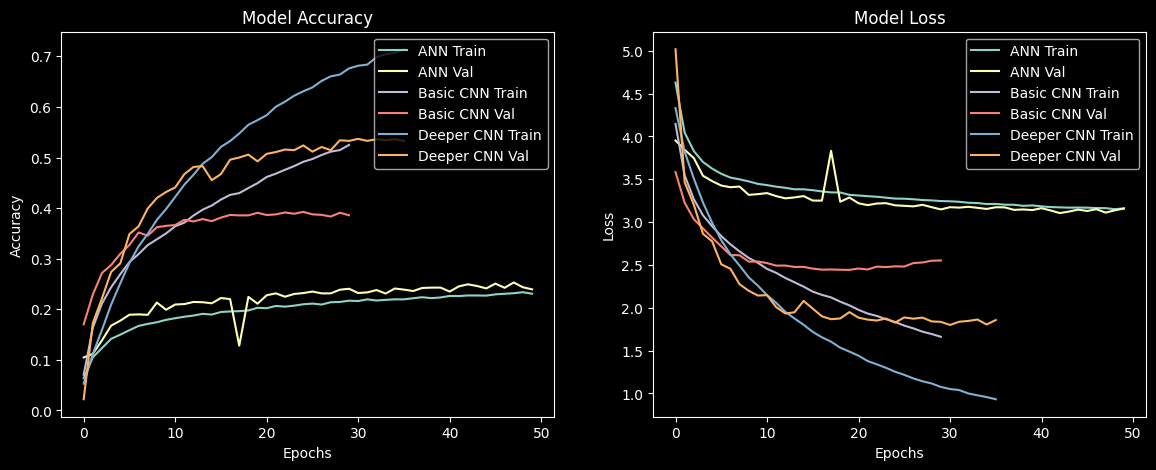

In [ ]:
import matplotlib.pyplot as plt

def plot_history(histories, model_names):
    plt.figure(figsize=(14,5))

    # Accuracy
    plt.subplot(1,2,1)
    for history, name in zip(histories, model_names):
        plt.plot(history.history['accuracy'], label=f'{name} Train')
        plt.plot(history.history['val_accuracy'], label=f'{name} Val')
    plt.title("Model Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    # Loss
    plt.subplot(1,2,2)
    for history, name in zip(histories, model_names):
        plt.plot(history.history['loss'], label=f'{name} Train')
        plt.plot(history.history['val_loss'], label=f'{name} Val')
    plt.title("Model Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

plot_history([ann_history, basic_cnn_history, deeper_cnn_history],
             ["ANN", "Basic CNN", "Deeper CNN"])

**4.4 Confusion Matrix**

With 100 classes, the confusion matrix is large. To keep it useful, we can either:

Plot full 100×100 matrix (dense but complete).

Or show subset of classes (e.g., first 20).

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


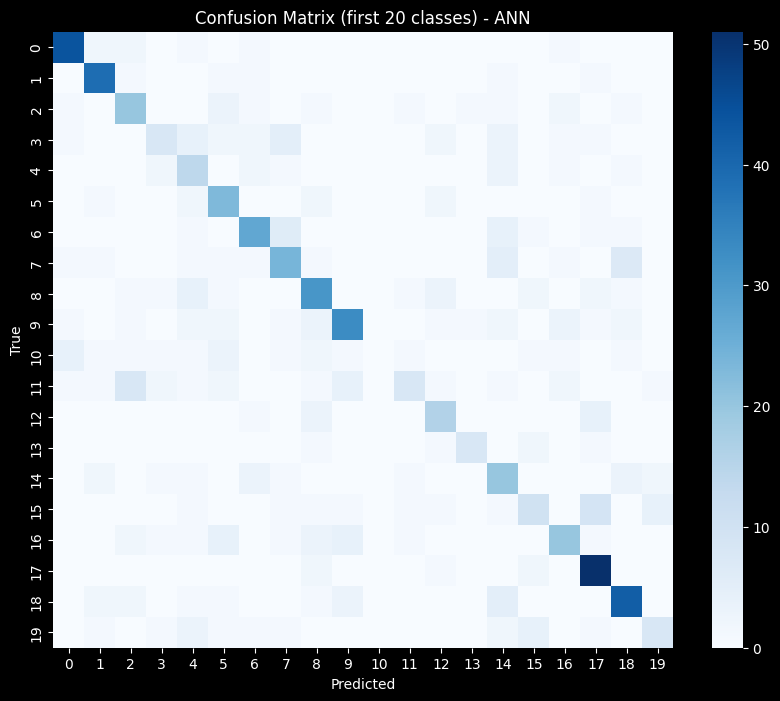

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


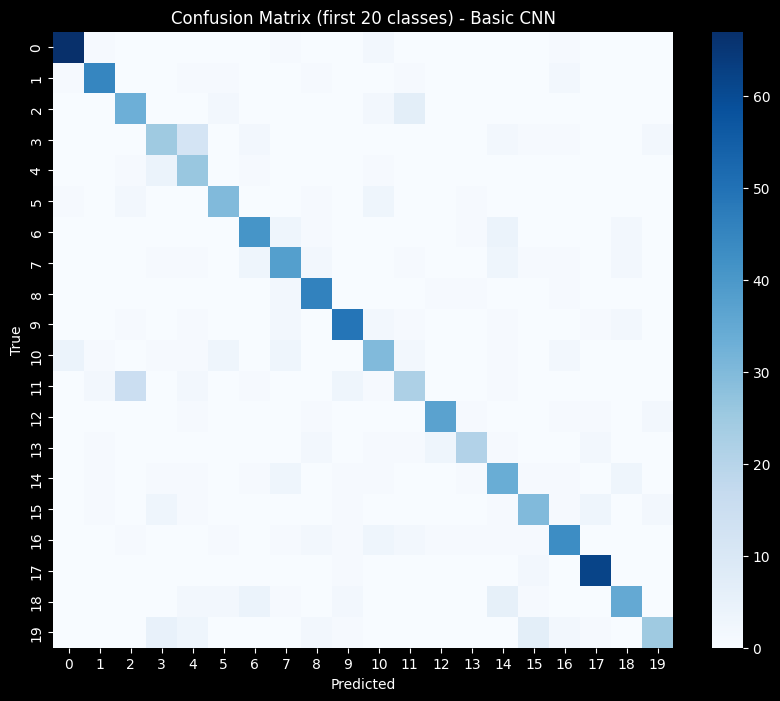

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


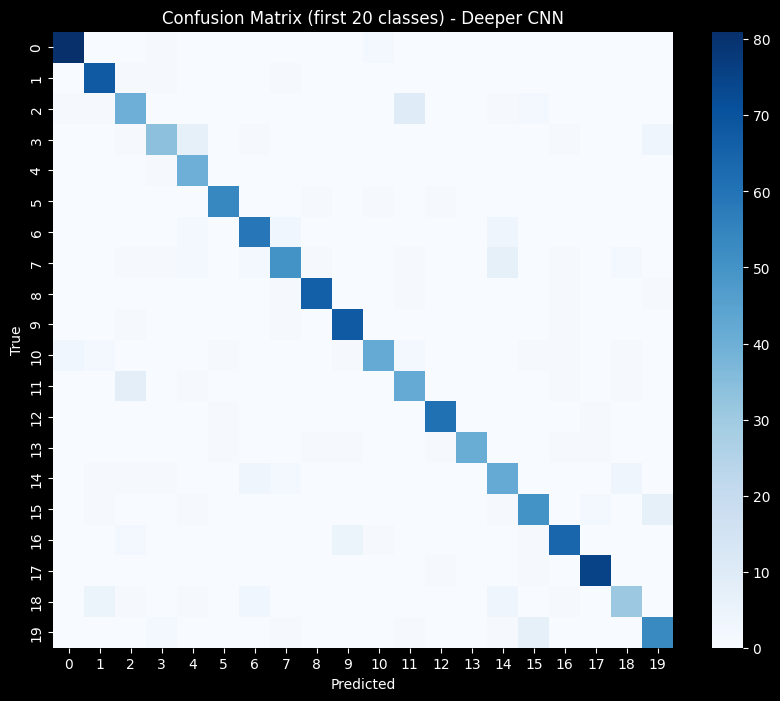

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

def plot_confusion_matrix(model, X, y_true, title, max_classes=20):
    y_pred = model.predict(X)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_true, axis=1)

    cm = confusion_matrix(y_true_classes, y_pred_classes)

    # Show only a subset for readability (default: first 20 classes)
    cm_small = cm[:max_classes, :max_classes]

    plt.figure(figsize=(10,8))
    sns.heatmap(cm_small, annot=False, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix (first {max_classes} classes) - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

plot_confusion_matrix(ann_model, x_test, y_test_one_hot, "ANN")
plot_confusion_matrix(basic_cnn_model, x_test, y_test_one_hot, "Basic CNN")
plot_confusion_matrix(deeper_cnn_model, x_test, y_test_one_hot, "Deeper CNN")

#**5. Prediction Analysis**

**5.1 Choose Best Model**

In [ ]:
# Use Deeper CNN (best model) for analysis
best_model = deeper_cnn_model

**5.2 Generate Predictions**

In [ ]:
y_pred = best_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_one_hot, axis=1)

# Indices of correct and incorrect predictions
correct = np.where(y_pred_classes == y_true_classes)[0]
incorrect = np.where(y_pred_classes != y_true_classes)[0]

print("Total correct predictions:", len(correct))
print("Total incorrect predictions:", len(incorrect))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Total correct predictions: 5454
Total incorrect predictions: 4546


**5.3 CIFAR-100 Class Names**

In [ ]:
# CIFAR-100 fine label names (manually defined, since Keras doesn't return them)
fine_label_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'computer_keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

import numpy as np
label_names = np.array(fine_label_names)

In [ ]:
print("True label:", label_names[y_true_classes[0]])
print("Predicted:", label_names[y_pred_classes[0]])

True label: mountain
Predicted: cockroach


**5.4 Visualization Function**

In [ ]:
import matplotlib.pyplot as plt

def show_examples(indices, title, predictions=True, n=9):
    plt.figure(figsize=(10, 6))
    for i, idx in enumerate(indices[:n]):
        plt.subplot(3, 3, i+1)
        plt.imshow(x_test[idx])
        if predictions:
            plt.title(f"Pred: {label_names[y_pred_classes[idx]]}\nTrue: {label_names[y_true_classes[idx]]}",
                      fontsize=8)
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

**5.5 Show Correct & Incorrect Predictions**

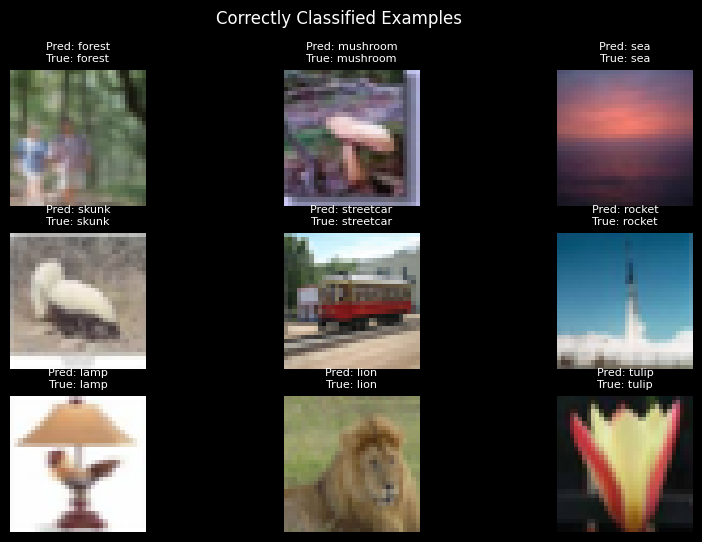

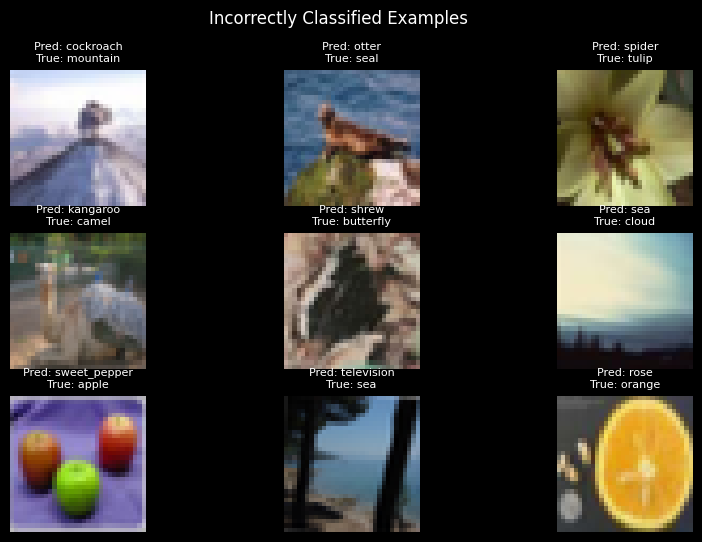

In [ ]:
# Correctly classified samples
show_examples(correct, "Correctly Classified Examples")

# Misclassified samples
show_examples(incorrect, "Incorrectly Classified Examples")